In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

In [12]:
dataset=datasets.load_iris()

data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

### Display the first 10 rows

In [13]:
data.head(10)

Petal length  Petal Width  Sepal Length  Sepal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

In [14]:
data.describe()

Petal length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### Exercise 1.1: Use data.isnull().sum()! And write your observation below.

In [15]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [16]:
modData = data.append({'Petal length' : np.nan , 'Petal Width' : 3.6, 'Sepal Length': 0,
                       'Sepal Width': 0.2, 'Species': 'setosa' } , ignore_index=True)
modData.describe()

Petal length  Petal Width  Sepal Length  Sepal Width
count    150.000000   151.000000    151.000000   151.000000
mean       5.843333     3.060927      3.733113     1.192715
std        0.828066     0.436650      1.785785     0.764033
min        4.300000     2.000000      0.000000     0.100000
25%        5.100000     2.800000      1.550000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.350000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Now, our new dataset “modData” has new row with a missing value. Can you determine in which column is it? <b>Petal length</b>
What does np.nan mean? <b> missing data </b>

### Exercise 1.2: Repeat the task in Exercise 1.1 and write your observation below.

In [17]:
modData = data.append({'Petal length' : np.nan , 'Petal Width' : 3.6, 'Sepal Length': 0,
                       'Sepal Width': 0.2, 'Species': 'setosa' } , ignore_index=True)
modData.describe()

Petal length  Petal Width  Sepal Length  Sepal Width
count    150.000000   151.000000    151.000000   151.000000
mean       5.843333     3.060927      3.733113     1.192715
std        0.828066     0.436650      1.785785     0.764033
min        4.300000     2.000000      0.000000     0.100000
25%        5.100000     2.800000      1.550000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.350000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [18]:
print('Columns with missing values')
print(modData.isnull().sum())
print('\n Columns with zero values')
print((modData[['Petal length','Petal Width','Sepal Length','Sepal Width','Species']]==0).sum())

Columns with missing values
Petal length    1
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

 Columns with zero values
Petal length    0
Petal Width     0
Sepal Length    1
Sepal Width     0
Species         0
dtype: int64


In [19]:
modData[['Petal length',
         'Petal Width',
         'Sepal Length',
         'Sepal Width','Species']] = modData[['Petal length',
                                              'Petal Width',
                                              'Sepal Length',
                                              'Sepal Width',
                                              'Species']].replace(0, np.NaN)
print('Columns with missing values')
print(modData.isnull().sum())

Columns with missing values
Petal length    1
Petal Width     0
Sepal Length    1
Sepal Width     0
Species         0
dtype: int64


In [20]:
# fill missing values with mean column values
modData.fillna(modData.mean(), inplace=True)
# count the number of NaN values in each column
print(modData.isnull().sum())

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64


### Exercise 1.3: Instead of using mean(). Try to use Median

In [21]:
# fill missing values with mean column values
modData.fillna(modData.median(), inplace=True)
# count the number of NaN values in each column
print(modData.isnull().sum())

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64


## PCA

In [22]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
PCA_df = pd.read_csv(url,names=['Petal length','Petal Width','Sepal Length','Sepal Width','target'])

## Standardization Data

In [23]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
features = ['Petal length','Petal Width','Sepal Length','Sepal Width']
# Separating out the features
x=  PCA_df.loc[:,features].values
# Separating out the target
y = PCA_df.loc[: , ['target']].values
# Standardizing the features
x=StandardScaler().fit_transform(x)
print(y)

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

## PCA Projection to 2D

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

## Concatenating DataFrame along axis


In [25]:
finalDf = pd.concat([principalDf, PCA_df[['target']]], axis = 1)

## Visualize 2D Projection

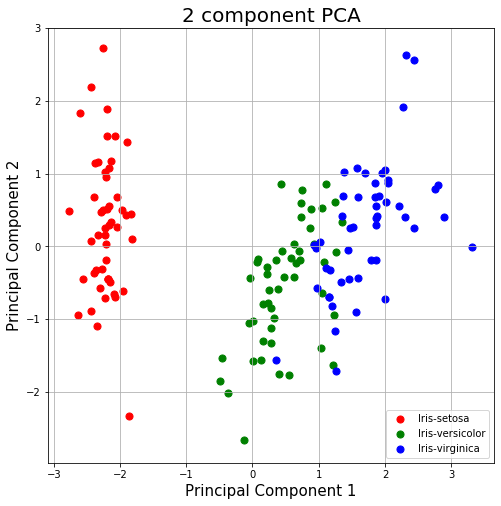

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(color_codes=True)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]
